# Exploration of Loan Dataset from Prosper
## by Emad Tolba Elshahat Muhammad

## Investigation Overview

> This presentation will investigate what factors affect a loan’s outcome status?

## Dataset Overview

> The dataset has 113937 rows of loans entries and 81 features(columns). Each loan contain information on the borrowered's background information and details regarding the loans. We selecting only 10 features(columns) for investegation and after dropping Null values the data will contains 84853 loans entries.

>This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains all variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
data= pd.read_csv('prosperLoanData.csv')


In [4]:
# Selecting feature of interest and related features
selected_features = ['Term','LoanStatus','BorrowerAPR', 'ProsperScore', 'BorrowerState', 
                     'EmploymentStatus', 'CreditScoreRangeUpper', 'LoanOriginalAmount',
                     'AvailableBankcardCredit', 'StatedMonthlyIncome' ]
data = data[selected_features]
data.dropna(inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Status 

> __Loan Status variable has very large number of Current loans which was excluded. After excluding the loans with status Current, there are 69.54% loans with status 'Completed', 3.55% with status 'Defaulted', 8.03% with status 'PastDue' and 18.87% with status 'Chargedoff'.__

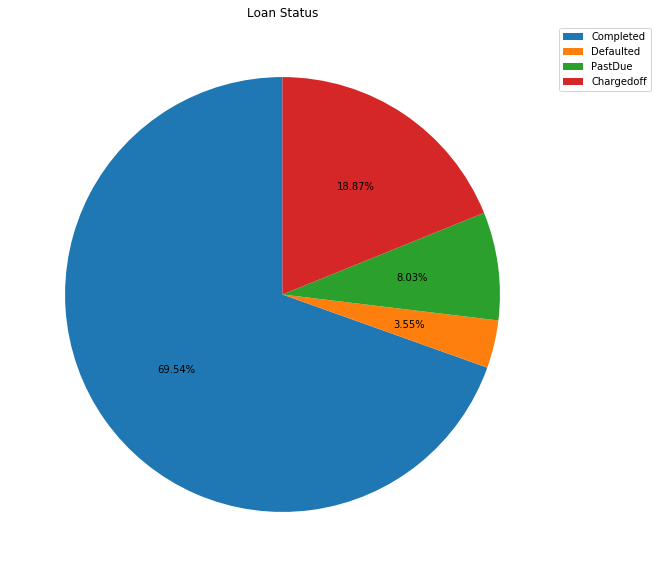

In [5]:
#  Pie chart for Loan status excluding the loans with status Current
Completed = data[data['LoanStatus']== 'Completed'].shape[0]  
Defaulted = data[data['LoanStatus']== 'Defaulted'].shape[0]  
PastDue = data[(data['LoanStatus'] == 'Past Due (1-15 days)') | 
                 (data['LoanStatus'] == 'Past Due (31-60 days)') |
                 (data['LoanStatus'] == 'Past Due (61-90 days)') | 
                 (data['LoanStatus'] == 'Past Due (91-120 days)') |
                 (data['LoanStatus'] == 'Past Due (16-30 days)') | 
                 (data['LoanStatus'] == 'FinalPaymentInProgress') |
                 (data['LoanStatus'] == 'Past Due (>120 days)')].shape[0] 
Chargedoff = data[data['LoanStatus']== 'Chargedoff'].shape[0]  

plt.figure(figsize=[10,10])
loan_status_without_current = [Completed, Defaulted, PastDue, Chargedoff ]
labels = [ 'Completed', 'Defaulted', 'PastDue', 'Chargedoff']
plt.pie(loan_status_without_current , startangle = 90, autopct='%1.2f%%') 
plt.title('Loan Status')
plt.legend(labels, loc="best", bbox_to_anchor=(1,1));

## Distribution of  Borrower’s Annual Percentage Rate (BorrowerAPR)

>  __Borrower’s Annual Percentage Rate (APR) is normal distribution with exceptional high count at BorrowerAPR about 0.36 %.__

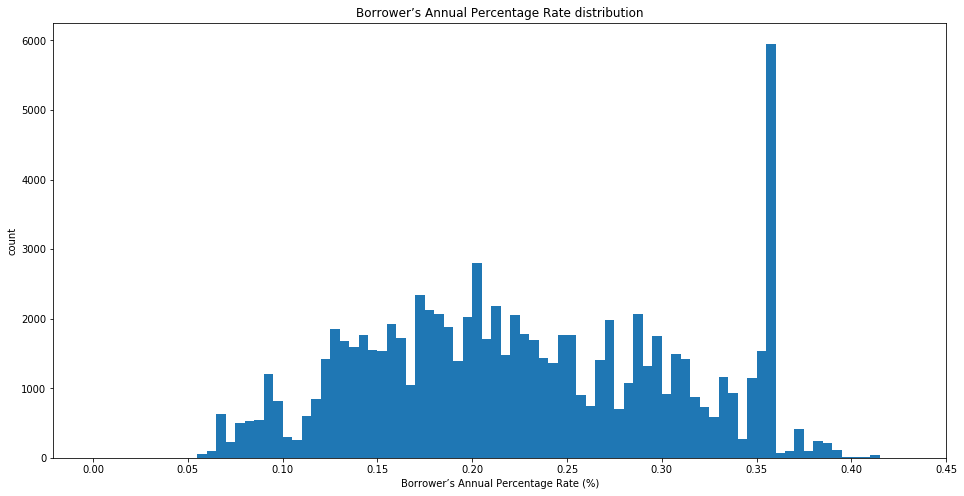

In [6]:
#histogram plot
bins = np.arange(0, data['BorrowerAPR'].max(), 0.005)
plt.figure(figsize=(16, 8))
plt.hist(data =  data, x= 'BorrowerAPR', bins = bins)
plt.title('Borrower’s Annual Percentage Rate distribution')
plt.xlabel('Borrower’s Annual Percentage Rate (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, data['BorrowerAPR'].max()+0.05, 0.05));

## Loan Status Vs Borrower APR

>- **The mean of Borrower APR for Defaulted LoanStatus is higher than that one the Completed status.**
- **The  higher Borrower APR  is higher possibility for Defaulted status . On the other hand, the Completed cases are evenly distributed for the Borrower APR**



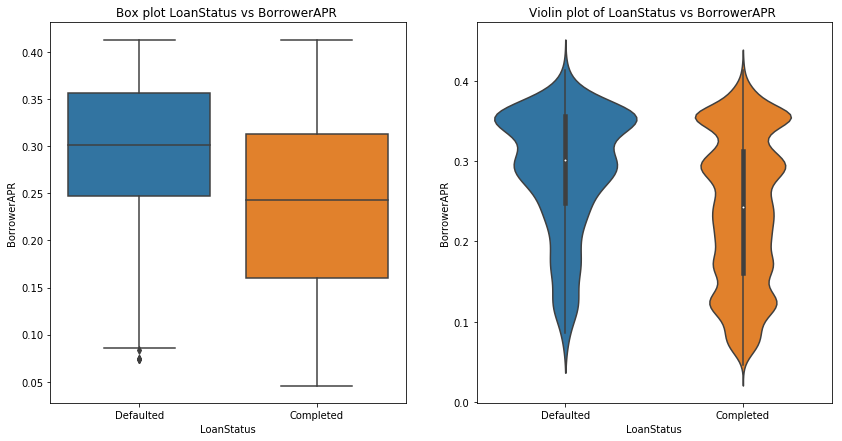

In [7]:
# filter LoanStatus with the Completed and Defaulted status 
filterd_data2 = data[(data['LoanStatus'] == 'Completed') | 
                    (data['LoanStatus'] == 'Defaulted')]
#Boxplot for LoanStatus vs BorrowerAPR 
plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
sb.boxplot(data = filterd_data2, x='LoanStatus', y='BorrowerAPR')
plt.title('Box plot LoanStatus vs BorrowerAPR ')
plt.xlabel('LoanStatus')
plt.ylabel('BorrowerAPR')
#Violinplot for LoanStatus vs BorrowerAPR 
plt.subplot(1,2,2)
sb.violinplot(data = filterd_data2, x='LoanStatus', y='BorrowerAPR')
plt.title('Violin plot of LoanStatus vs BorrowerAPR ')
plt.xlabel('LoanStatus')
plt.ylabel('BorrowerAPR');

## Loan Status Vs Prosper Score

> **ProsperScore '1' has the highest number of Defaulted cases and ProsperScore '10' has the least number of Defaulted cases as expected large score being least risky.**

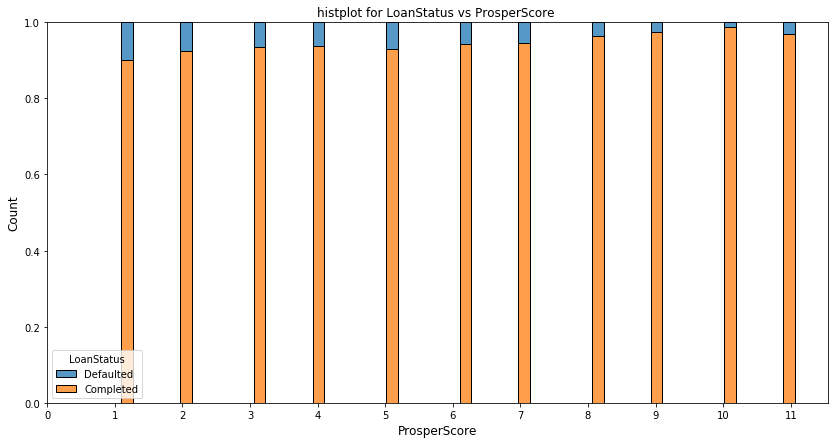

In [8]:
# filter LoanStatus with the Completed and Defaulted status 
filterd_data2 = data[(data['LoanStatus'] == 'Completed') | 
                    (data['LoanStatus'] == 'Defaulted')]
# !pip install seaborn --upgrade (to upgrade seaborn) to use histplot function
# using Histplot for plotting Normalized Completed and Defaulted status for each Prosper Score to 
#compare between them  
plt.figure(figsize=(14,7))
sb.histplot(data=filterd_data2, x="ProsperScore", hue="LoanStatus", stat="probability",
            multiple="fill", shrink=.8)  
plt.title('histplot for LoanStatus vs ProsperScore ')
plt.xlabel('ProsperScore', size = 12)
plt.ylabel('Count', size =12)
plt.xticks(np.arange(0, 12, 1));

## ProsperScore Vs Term Vs LoanStatus
>- __Most Defaulted LoanStatus are in long Term Loans with 36 months term followed by 60 months.__
- __The loans of 12 months Trem are less possible to be Defaulted__

<Figure size 1152x504 with 0 Axes>

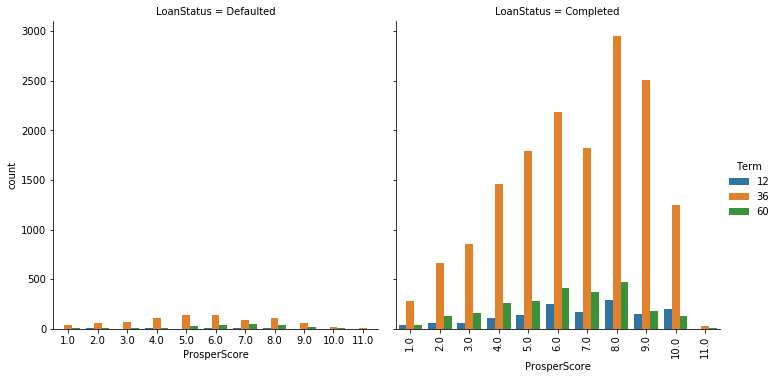

In [11]:
# catplot for ProsperScore Vs Term Vs LoanStatus
plt.figure(figsize=[16,7])
sb.catplot(x="ProsperScore", hue="Term", col="LoanStatus",
                data=filterd_data2, kind="count")
plt.xticks(rotation=90);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert my_project_slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!